In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

/home/pongpop/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv("../data/data.csv")
df.head()

,Province/State,City/County/Borough/Region,Date,Total Death,Total Confirmed,Death Rate
0,Alabama,Choctaw,2022-08-20,37,2155,0.017169
1,Alabama,Perry,2022-08-20,47,2366,0.019865
2,Alabama,Wilcox,2022-08-19,48,3299,0.014550
3,Alabama,Greene,2022-08-19,51,2079,0.024531
4,Alabama,Sumter,2022-08-20,52,2882,0.018043


In [3]:
city_df_allyear = df.groupby(df["City/County/Borough/Region"]).sum().reset_index()
city_df_allyear

/tmp/ipykernel_666/4149175827.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_df_allyear = df.groupby(df['City/County/Borough/Region']).sum().reset_index()


,City/County/Borough/Region,Total Death,Total Confirmed,Death Rate
0,Abbeville,70,6629,0.010560
1,Acadia,298,17622,0.016911
2,Accomack,111,7968,0.013931
3,Ada,1053,149367,0.007050
4,Adair,307,23309,0.066833
...,...,...,...,...
1922,Yukon-Koyukuk,11,1617,0.006803
1923,Yuma,1220,69000,0.029992
1924,Zapata,55,4072,0.013507
1925,Zavala,69,4336,0.015913


In [4]:
city_df_allyear.drop(columns=["Total Confirmed"], inplace=True)
city_df_allyear.drop(columns=["Death Rate"], inplace=True)
city_df_allyear.head()

,City/County/Borough/Region,Total Death
0,Abbeville,70
1,Acadia,298
2,Accomack,111
3,Ada,1053
4,Adair,307


In [5]:
city_df_allyear = city_df_allyear.sort_values(by="Total Death", ascending=False)
city_df_allyear.head()

,City/County/Borough/Region,Total Death
1034,Los Angeles,32991
1076,Maricopa,17726
417,Cook,14759
936,Kings,13671
1421,Queens,12204


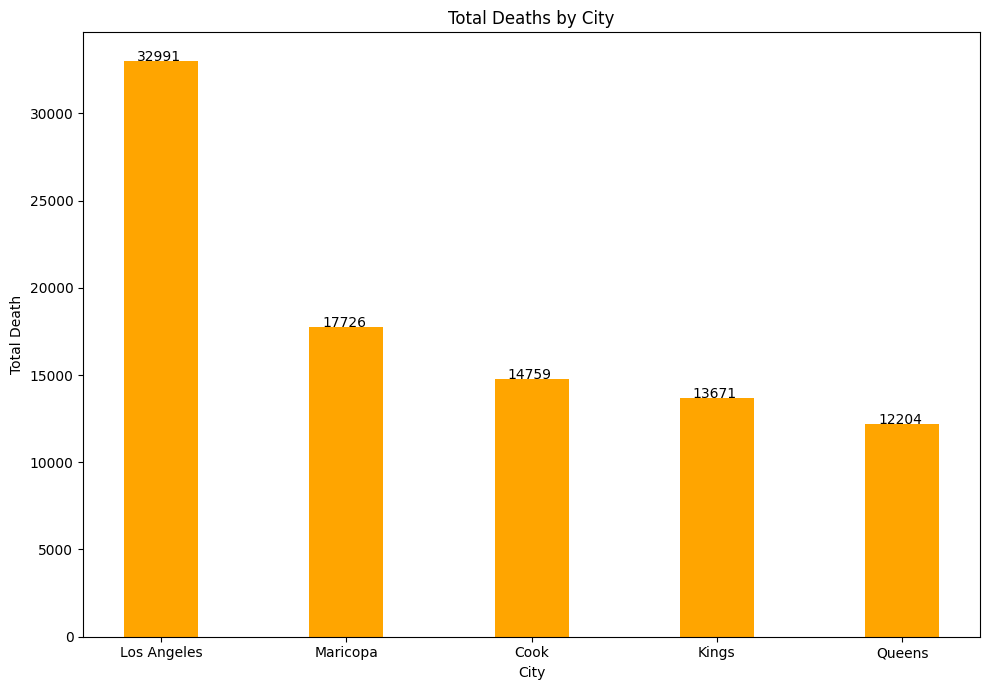

In [6]:
# show total Deaths by year 2020 - 2022
city_df_allyear = city_df_allyear[:5]
plt.figure(figsize=(10, 7))
plt.bar(
    city_df_allyear["City/County/Borough/Region"],
    city_df_allyear["Total Death"],
    width=0.4,
    color="orange",
)
plt.xlabel("City")
plt.ylabel("Total Death")
plt.title("Total Deaths by City")
plt.xticks(rotation=0)
for bar in plt.bar(
    city_df_allyear["City/County/Borough/Region"],
    city_df_allyear["Total Death"],
    width=0.4,
    color="orange",
):
    plt.annotate(
        bar.get_height(), xy=(bar.get_x() + 0.07, bar.get_height() + 10), fontsize=10
    )
plt.tight_layout()


plt.savefig("total_deaths_by_city.png")

In [7]:
# remove the image file
import os

os.remove("total_deaths_by_city.png")